In [1]:
import  scipy.stats  as  stats 
import  numpy  as  np  #linear algebra 
import  pandas  as  pd  #data processing, CSV file I/O (e.g. pd.read_csv) 
import  matplotlib.pyplot  as  plt #интерактивная визуализация 
import  statsmodels.api  as  sm  # regression fitting via matrices of regression design 
import  statsmodels.formula.api  as  smf  # data visualization, regression fitting 
import  io #преобразование строк в данные
import  seaborn  as  sns 

In [2]:
df  =  pd.read_csv('https://raw.githubusercontent.com/PomoshnikovV/Econometrica/master/python-notebooks/data-csv/3insurance.csv') 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Спецификация модели:
$$
charges = \beta_0 + \beta_1*age + \beta_2*sex + \beta_3*bmi + \beta_4*children + \beta_5*smoker
$$

Подогнанная прямая


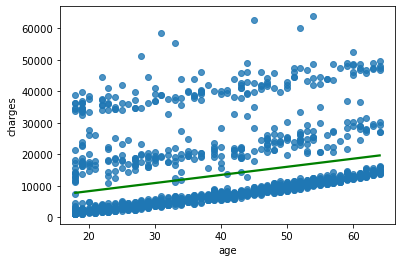

In [3]:
#Построение диаграммы рассеяния с подогнанной прямой
sns.regplot(data = df ,  y = 'charges' ,  x = 'age' ,  ci = None ,  line_kws = { "color":"g"}) 
print('Подогнанная прямая') 

In [4]:
# подгонка прямой 
fitted_line = smf.ols( formula = 'charges~age+C(sex)+bmi+children+C(smoker)',  data = df ).fit() 
# коэффициенты с округлением 
fitted_line.params.round(2) 

Intercept          -12052.46
C(sex)[T.male]       -128.64
C(smoker)[T.yes]    23823.39
age                   257.73
bmi                   322.36
children              474.41
dtype: float64

### Интерпретация
1. Мужчины в среднем платят за медицинскую страховку на 128.64 доллара больше женщин
2. Курящий человек в среднем платит на 23823 доллара больше за медицинскую страховку
3. В среднем увеличение возраста человека на 1 год приводит к увеличению стоимости медицинской страховки на 257.73 доллара
4. В среднем рост индекса массы тела на 1 пункт приводит к росту расходов на медицинское страхование на 322.36 доллара
5. В среднем каждый дополнительный ребенок в семье приводит к росту расходов на медицинское страхование на 474.41 доллар

<AxesSubplot:xlabel='age', ylabel='charges'>

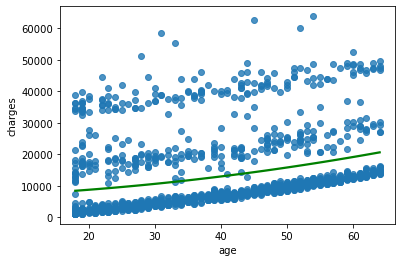

In [5]:
#Изменение порядка независимой переменной age -> график
sns.regplot(data = df ,  y = 'charges' ,  x = 'age' , order = 2 ,  ci = None ,  line_kws = {"color" : "g"})

In [6]:
# подгонка параболы 
fitted_pol = smf.ols(formula = 'charges~age+I(age**2)+sex+bmi+children+smoker' ,  data = df).fit() 
# коэффициенты с округлением 
fitted_pol.params.round(2)

Intercept        -6701.37
sex[T.male]       -135.75
smoker[T.yes]    23835.37
age                -54.72
I(age ** 2)          3.94
bmi                318.58
children           641.33
dtype: float64

### Наблюдается "растущая отдача" с увеличением возраста. Т.е. расходы на медицинское страхование растут по экспоненте относительно твоего возраста. Скорее всего это верно. Можно догадаться импирически, что, чем ты старше, тем больше "болячек" у тебя появляется: суставы изнашиваются, у тебя меньше энергии, восстановление после травм происходит намного дольше, нежели в молодости. Следовательно, растут и расходы на медицинское обслуживание

# Тут я запутался!!! Но у меня получилось справиться с проблемой!
UPD: Нашел какой-то видос на ютюбе. С помощью него все получилось исправить! https://www.youtube.com/watch?v=PZ90sEYQUQE

In [7]:
def tran_sex(x):
    if x == 'male':
        return 1
    if x == 'female':
        return 0
df['sex'] = df['sex'].apply(tran_sex)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [8]:
def tran_smoker(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
df['smoker'] = df['smoker'].apply(tran_smoker)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [9]:
#добавляем доп. столбец с предсказанными (fitted) значениями
df['pred']=(-12052.46)+(-128.64)*df['sex']+23823.39*df['smoker']+257.73*df['age']+322.36*df['bmi']+474.41*df['children']
df

,age,sex,bmi,children,smoker,region,charges,pred
0,19,0,27.900,0,1,southwest,16884.92400,25661.6440
1,18,1,33.770,1,0,southeast,1725.55230,3818.5472
2,28,1,33.000,3,0,southeast,4449.46200,7096.4500
3,33,1,22.705,0,0,northwest,21984.47061,3643.1738
4,32,1,28.880,0,0,northwest,3866.85520,5376.0168
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,12112.1192
1334,18,0,31.920,0,0,northeast,2205.98080,2876.4112
1335,18,0,36.850,0,0,southeast,1629.83350,4465.6460
1336,21,0,25.800,0,0,southwest,2007.94500,1676.7580


## Ничего не получилось ---> все получилось!

In [10]:
#Total Sum Square формула через среднее
TSS = ((df['charges']-np.mean(df['charges']))**2).sum()
print('TSS =', TSS.round(3))

TSS = 196074221568.367


In [11]:
#Residual Sum Square формула
RSS = ((df['charges']-df['pred'])**2).sum()
print('RSS =', RSS.round(3))

RSS = 49072964202.123


In [12]:
#ESS
ESS = ((df['pred']-np.mean(df['charges']))**2).sum()
print('ESS =', ESS.round(3))

ESS = 147000384923.003


In [13]:
#R^2
R2=ESS/TSS
print('R2 =', R2.round(4))

R2 = 0.7497


In [14]:
#R^2_adj
n = 1338
k = 5
R2adj = 1 - (1-R2)*(n-1)/(n-k-1)
print('R2adj =', R2adj)

R2adj = 0.7487785627816057


In [15]:
#Подгонка прямой + саммари по ней
model = smf.ols(data=df, formula='charges~age+I(age**2)+sex+bmi+children+smoker').fit()
model.summary(alpha=0.05).tables[1] #оставляем только одну табличку от общего саммари

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-6701.3694,1668.148,-4.017,0.000,-9973.855,-3428.884
age,-54.7221,81.088,-0.675,0.500,-213.796,104.351
I(age ** 2),3.9400,1.012,3.895,0.000,1.956,5.924
sex,-135.7539,331.606,-0.409,0.682,-786.282,514.774
bmi,318.5821,27.291,11.673,0.000,265.044,372.120
children,641.3250,143.668,4.464,0.000,359.485,923.165
smoker,2.384e+04,410.358,58.084,0.000,2.3e+04,2.46e+04


In [16]:
#t критическое
alpha = 0.05
n = 1338
k = 5
#ppf - percent point function
t_cr = stats.t.ppf(1-alpha/2, n-k-1)
print('t_crit =', t_cr)

t_crit = 1.9617465608647315


In [17]:
#определяем данные
data = '''coef	std.err	t	P>|t|	[0.025	0.975]
Intercept	-6701.3694	1668.148	-4.017	0.000	-9973.855	-3428.884
age	-54.7221	81.088	-0.675	0.500	-213.796	104.351
I(age**2)	3.9400	1.012	3.895	0.000	1.956	5.924
sex	-135.7539	331.606	-0.409	0.682	-786.282	514.774
bmi	318.5821	27.291	11.673	0.000	265.044	372.120
children	641.3250	143.668	4.464	0.000	359.485	923.165
smoker	2.384e+04	410.358	58.084	0.000	2.3e+04	2.46e+04'''

In [18]:
# создаём DataFrame
df_t = pd.read_csv(io.StringIO(data), sep='\s+')
df_t

,coef,std.err,t,P>|t|,[0.025,0.975]
Intercept,-6701.3694,1668.148,-4.017,0.000,-9973.855,-3428.884
age,-54.7221,81.088,-0.675,0.500,-213.796,104.351
I(age**2),3.9400,1.012,3.895,0.000,1.956,5.924
sex,-135.7539,331.606,-0.409,0.682,-786.282,514.774
bmi,318.5821,27.291,11.673,0.000,265.044,372.120
children,641.3250,143.668,4.464,0.000,359.485,923.165
smoker,23840.0000,410.358,58.084,0.000,23000.000,24600.000


In [19]:
#Создаю столбец со значимостью регрессоров (при гипотезе b=0)
df_t['result'] = df_t.apply(lambda x: 'значимо' if abs(x['t'])>t_cr else 'не значимо',axis=1)
df_t

,coef,std.err,t,P>|t|,[0.025,0.975],result
Intercept,-6701.3694,1668.148,-4.017,0.000,-9973.855,-3428.884,значимо
age,-54.7221,81.088,-0.675,0.500,-213.796,104.351,не значимо
I(age**2),3.9400,1.012,3.895,0.000,1.956,5.924,значимо
sex,-135.7539,331.606,-0.409,0.682,-786.282,514.774,не значимо
bmi,318.5821,27.291,11.673,0.000,265.044,372.120,значимо
children,641.3250,143.668,4.464,0.000,359.485,923.165,значимо
smoker,23840.0000,410.358,58.084,0.000,23000.000,24600.000,значимо


## Коэффициент регрессии второго порядка при переменной "age" значим! Значит, действительно существует "возрастающая отдача" от возраста на траты на медицинскую страховку!

In [20]:
df  =  pd.read_csv('https://raw.githubusercontent.com/PomoshnikovV/Econometrica/master/python-notebooks/data-csv/3insurance.csv') 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
def tran_smoker(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
df['smoker'] = df['smoker'].apply(tran_smoker)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [22]:
d1 = df[df['sex']=='male']
d0 = df[df['sex']=='female']
d1

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
8,37,male,29.830,2,0,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,0,northwest,4239.89265
1325,61,male,33.535,0,0,northeast,13143.33665
1327,51,male,30.030,1,0,southeast,9377.90470
1329,52,male,38.600,2,0,southwest,10325.20600


In [23]:
# подгонка прямой 
fitted_lined1 = smf.ols( formula = 'charges~age+bmi+children+smoker',  data = d1).fit() 
# коэффициенты с округлением 
fitted_lined1.params.round(2)

Intercept   -12243.64
age            257.20
bmi            317.37
children       474.58
smoker       24834.77
dtype: float64

In [24]:
#добавляем доп. столбец с предсказанными (fitted) значениями
d1['pred']=(-12243.64)+24834.77*d1['smoker']+257.20*d1['age']+317.37*d1['bmi']+474.58*d1['children']
d1

C:\Users\danil\AppData\Local\Temp/ipykernel_10928/4135988295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['pred']=(-12243.64)+24834.77*d1['smoker']+257.20*d1['age']+317.37*d1['bmi']+474.58*d1['children']


,age,sex,bmi,children,smoker,region,charges,pred
1,18,male,33.770,1,0,southeast,1725.55230,3578.12490
2,28,male,33.000,3,0,southeast,4449.46200,6854.91000
3,33,male,22.705,0,0,northwest,21984.47061,3449.84585
4,32,male,28.880,0,0,northwest,3866.85520,5152.40560
8,37,male,29.830,2,0,northeast,6406.41070,7689.06710
...,...,...,...,...,...,...,...,...
1324,31,male,25.935,1,0,northwest,4239.89265,4435.13095
1325,61,male,33.535,0,0,northeast,13143.33665,14088.56295
1327,51,male,30.030,1,0,southeast,9377.90470,10878.76110
1329,52,male,38.600,2,0,southwest,10325.20600,14330.40200


In [25]:
#Total Sum Square формула через среднее
TSS = ((d1['charges']-np.mean(d1['charges']))**2).sum()
print('TSSd1 =', TSS.round(3))

TSSd1 = 113567071469.535


In [26]:
#Residual Sum Square формула
RSS = ((d1['charges']-d1['pred'])**2).sum()
print('RSSd1 =', RSS.round(3))

RSSd1 = 25039867569.267


In [27]:
#ESS
ESS = ((d1['pred']-np.mean(d1['charges']))**2).sum()
print('ESSd1 =', ESS.round(3))

ESSd1 = 88527475907.074


In [28]:
#R^2
R2=ESS/TSS
print('R2 =', R2.round(4))

R2 = 0.7795


In [29]:
#R^2_adj
n = 676
k = 4
R2adj = 1 - (1-R2)*(n-1)/(n-k-1)
print('R2adj =', R2adj)

R2adj = 0.7782027609568984


## R2 и R2adj стали больше, чем было до этого: 0.7795>0.7497; 0,7782 > 0.7488. Значит, точность подгонки возросла!

In [30]:
df  =  pd.read_csv('https://raw.githubusercontent.com/PomoshnikovV/Econometrica/master/python-notebooks/data-csv/3insurance.csv') 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
def tran_sex(x):
    if x == 'male':
        return 1
    if x == 'female':
        return 0
df['sex'] = df['sex'].apply(tran_sex)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [32]:
def tran_smoker(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
df['smoker'] = df['smoker'].apply(tran_smoker)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


## Регрессия третьего порядка

In [33]:
# подгонка прямой для регрессии третьего порядка
fitted_line = smf.ols(formula = 'charges~-1+age+I(age**2)+I(age**3)+age+sex+bmi+children+smoker',  data = df).fit() 
# коэффициенты с округлением 
fitted_line.params.round(2) 

age             -608.37
I(age ** 2)       18.28
I(age ** 3)       -0.12
sex             -149.78
bmi              311.67
children         659.80
smoker         23843.69
dtype: float64

In [34]:
#Подгонка прямой + саммари по ней
model = smf.ols(data=df, formula='charges~age+I(age**2)+I(age**3)+sex+bmi+children+smoker').fit()
model.summary(alpha=0.05).tables[1] #оставляем только одну табличку от общего саммари

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-5747.2803,4455.350,-1.290,0.197,-1.45e+04,2992.999
age,-138.9529,373.616,-0.372,0.710,-871.894,593.988
I(age ** 2),6.1952,9.817,0.631,0.528,-13.063,25.453
I(age ** 3),-0.0187,0.081,-0.231,0.817,-0.177,0.140
sex,-135.8903,331.725,-0.410,0.682,-786.651,514.870
bmi,318.5182,27.302,11.666,0.000,264.958,372.078
children,642.3337,143.785,4.467,0.000,360.263,924.405
smoker,2.384e+04,410.667,58.047,0.000,2.3e+04,2.46e+04


In [35]:
data = '''coef	std.err	t	P>|t|	[0.025	0.975]
Intercept	-5747.2803	4455.350	-1.290	0.197	-1.45e+04	2992.999
age	-138.9529	373.616	-0.372	0.710	-871.894	593.988
I(age**2)	6.1952	9.817	0.631	0.528	-13.063	25.453
I(age**3)	-0.0187	0.081	-0.231	0.817	-0.177	0.140
sex	-135.8903	331.725	-0.410	0.682	-786.651	514.870
bmi	318.5182	27.302	11.666	0.000	264.958	372.078
children	642.3337	143.785	4.467	0.000	360.263	924.405
smoker	2.384e+04	410.667	58.047	0.000	2.3e+04	2.46e+04'''

In [36]:
# создаём DataFrame
df3 = pd.read_csv(io.StringIO(data), sep='\s+')
df3

,coef,std.err,t,P>|t|,[0.025,0.975]
Intercept,-5747.2803,4455.350,-1.290,0.197,-14500.000,2992.999
age,-138.9529,373.616,-0.372,0.710,-871.894,593.988
I(age**2),6.1952,9.817,0.631,0.528,-13.063,25.453
I(age**3),-0.0187,0.081,-0.231,0.817,-0.177,0.140
sex,-135.8903,331.725,-0.410,0.682,-786.651,514.870
bmi,318.5182,27.302,11.666,0.000,264.958,372.078
children,642.3337,143.785,4.467,0.000,360.263,924.405
smoker,23840.0000,410.667,58.047,0.000,23000.000,24600.000


In [37]:
#добавляем доп. столбец с предсказанными (fitted) значениями
df['pred']=(-128.64)*df['sex']+23843.69*df['smoker']+(-608.37)*df['age']+18.28*df['age']**2+(-0.12)*df['age']**3+311.67*df['bmi']+659.80*df['children']
df

,age,sex,bmi,children,smoker,region,charges,pred
0,19,0,27.900,0,1,southwest,16884.92400,26756.25300
1,18,1,33.770,1,0,southeast,1725.55230,5328.47590
2,28,1,33.000,3,0,southeast,4449.46200,6798.79000
3,33,1,22.705,0,0,northwest,21984.47061,2466.09735
4,32,1,28.880,0,0,northwest,3866.85520,4191.10960
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,11784.67990
1334,18,0,31.920,0,0,northeast,2205.98080,4220.72640
1335,18,0,36.850,0,0,southeast,1629.83350,5757.25950
1336,21,0,25.800,0,0,southwest,2007.94500,2215.47600


In [38]:
#Total Sum Square формула через среднее
TSS = ((df['charges']-np.mean(df['charges']))**2).sum()
print('TSS_3 =', TSS.round(3))

TSS_3 = 196074221568.367


In [39]:
#Residual Sum Square формула
RSS = ((df['charges']-df['pred'])**2).sum()
print('RSS_3 =', RSS.round(3))

RSS_3 = 48902047602.092


In [40]:
#ESS
ESS = ((df['pred']-np.mean(df['charges']))**2).sum()
print('ESS_3 =', ESS.round(3))

ESS_3 = 144369123278.984


In [41]:
#R^2
R2=ESS/TSS
print('R2 =', R2.round(4))

R2 = 0.7363


## "Подгонка" без константы третьего порядка стала менее качественной. Значение R2 самое низкое из всех предыдущих наблюдений